In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = movie_resize2 
data_file = "./movie_resize2.csv"
df = pd.read_csv(data_file, encoding='UTF-8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     4642 non-null   object
 1   감독      4642 non-null   object
 2   배급사     4642 non-null   object
 3   개봉일     4642 non-null   object
 4   영화형태    4642 non-null   object
 5   국적      4642 non-null   object
 6   전국스크린수  4642 non-null   int64 
 7   전국 매출액  4642 non-null   int64 
 8   전국 관객수  4642 non-null   int64 
 9   장르      4642 non-null   object
 10  등급      4642 non-null   object
 11  영화구분    4642 non-null   object
dtypes: int64(3), object(9)
memory usage: 435.3+ KB


# 연도, 월 컬럼 추가하기

In [3]:
import datetime
df['개봉일']= pd.to_datetime(df['개봉일']) # 개봉일 datetime타입으로 바꿈
df['연도'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     4642 non-null   object        
 1   감독      4642 non-null   object        
 2   배급사     4642 non-null   object        
 3   개봉일     4642 non-null   datetime64[ns]
 4   영화형태    4642 non-null   object        
 5   국적      4642 non-null   object        
 6   전국스크린수  4642 non-null   int64         
 7   전국 매출액  4642 non-null   int64         
 8   전국 관객수  4642 non-null   int64         
 9   장르      4642 non-null   object        
 10  등급      4642 non-null   object        
 11  영화구분    4642 non-null   object        
 12  연도      4642 non-null   int64         
 13  월       4642 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 507.8+ KB


In [7]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화,2014,7
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화,2019,1
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화,2017,12
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화,2014,12
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화,2019,4


# 계절 컬럼 추가하기

* 나중에 원-핫인코딩 할 거야

In [18]:
season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

In [19]:
df['계절'] = df[['월']].apply(lambda x : x.map(season))

In [10]:
df.head()

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화,2014,7,여름
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화,2019,1,겨울
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화,2017,12,겨울
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화,2014,12,겨울
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화,2019,4,봄


In [20]:
df['계절'].value_counts()

가을    1224
겨울    1186
봄     1128
여름    1104
Name: 계절, dtype: int64

# 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt 

x=[1,2,3,4,5,7]
y=[2,1,6,4,8,5]

values = ['A', 'B', 'C', 'D','E','F'] 

plt.plot(x,y,marker="o")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Set X labels in Matplotlib Plot")
plt.xticks(x,values)
plt.show()

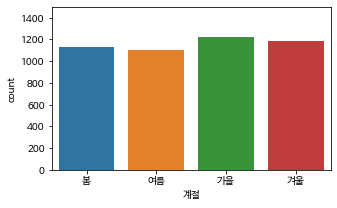

In [24]:
# 계절 별 흥행 영화 카운트
plt.rc('font', family='NanumBarunGothic') 

season_order = ['봄', '여름', '가을', '겨울']
# df['계절'] = df['계절'].loc[season_order] 
# ordered_index = df['계절'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
plt.ylim([0, 1500])      # X축의 범위: [xmin, xmax]
plt.yticks()
sns.countplot(data = df, x = '계절', order=season_order)
plt.show()

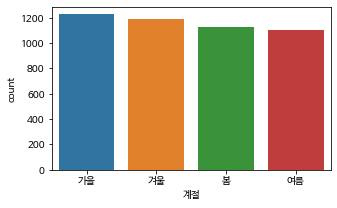

In [17]:
# 계절 별 흥행 영화 카운트
plt.rc('font', family='NanumBarunGothic') 

ordered_index = df['계절'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = df, x = '계절', order=ordered_index)
plt.show()

<Axes: xlabel='계절', ylabel='count'>

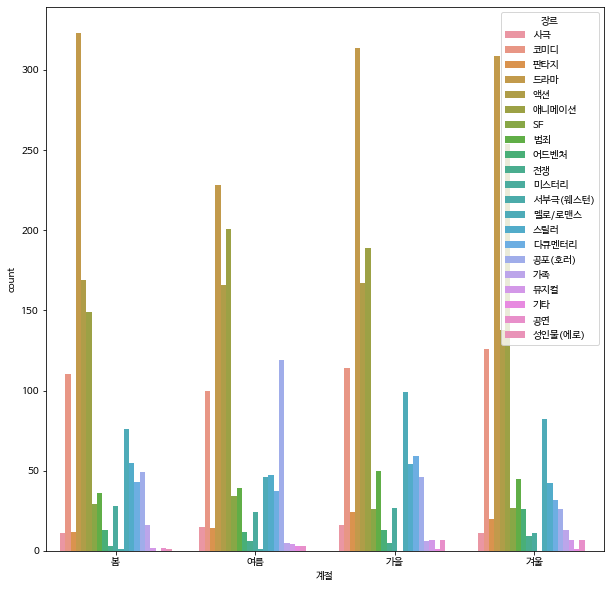

In [25]:
# 계절 별 흥행 영화 장르
plt.rc('font', family='NanumBarunGothic') 

season_order = ['봄', '여름', '가을', '겨울']

plt.figure(figsize=(10, 10))
sns.countplot(data = df, x='계절', hue = '장르', order=season_order)